In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [2]:
# Cargar el dataset procesado
data = pd.read_csv('data_evaluacion_processed.csv')

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [22]:
# Separar características y etiqueta
X = data.drop('salary', axis=1)
y = data['salary']

In [24]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Entrenar y evaluar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')

Logistic Regression Accuracy: 0.8242399426758112


In [30]:
# Evaluación del modelo
print('Train Accuracy : %.5f' % log_reg.score(X_train_scaled, y_train))
print('Test Accuracy : %.5f' % log_reg.score(X_test_scaled, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred_log_reg))

Train Accuracy : 0.82558
Test Accuracy : 0.82424
Precisión del modelo: 0.8242399426758112


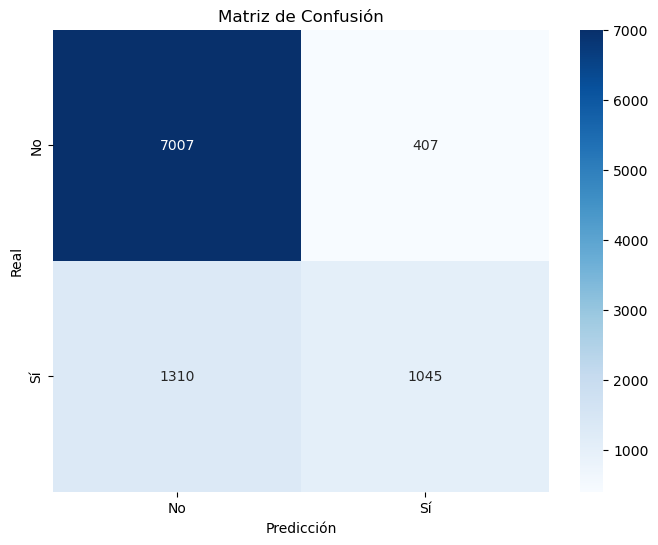

In [34]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Sí'], 
            yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()